In [1]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [2]:
from nltk.corpus import movie_reviews
sentences=[list(s)for s in movie_reviews.sents()]

In [5]:
#2. len(sentences)
#워드 투 벡터 생성 -> 테스트

71532

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
tf.reset_default_graph()
def MinMaxScaler(data):
    numerator=data-np.min(data,0)
    denominator=np.max(data,0)-np.min(data,0)
    return numerator/denominator

In [23]:
xy=np.loadtxt('TSLA.csv', delimiter=",", skiprows=1)
#xy=xy[::-1] 역순으로...

seq_length=7
train_size=int(len(xy)*0.7)
train_set=xy[0:train_size] #0~174
test_set=xy[train_size-seq_length:]# [175-7: ]
data_dim=5
hidden_dim=10
learning_rate=0.01
iterations=500
output_dim=1

train_set=MinMaxScaler(train_set)
test_set=MinMaxScaler(test_set)

In [24]:
def build_dataset(time_series, seq_length):    
    dataX=[]
    dataY=[]    
    for i in range(0, len(time_series)-seq_length):#(0,175-7)
        _x=time_series[i:i+seq_length, :] #일주일 data
        _y=time_series[i+seq_length,[-1]] # _x + 1의 종가
        #print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)
        
trainX, trainY=build_dataset(train_set, seq_length)
testX, testY=build_dataset(test_set, seq_length)
#              0~174          7

In [25]:
x=tf.placeholder(tf.float32, [None, seq_length, data_dim])
#                                          7         5
y=tf.placeholder(tf.float32, [None, 1])

cell=tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, activation=tf.tanh)
outputs, _states=tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
yHat=tf.contrib.layers.fully_connected(outputs[:,-1],output_dim, activation_fn=None)

cost=tf.reduce_sum(tf.square(yHat-y))
train=tf.train.AdamOptimizer(learning_rate).minimize(cost)

targets=tf.placeholder(tf.float32, [None,1])
predictions=tf.placeholder(tf.float32, [None,1])
rmse=tf.sqrt(tf.reduce_mean(tf.square(targets-predictions)))



step:0, cost:26.359222412109375
step:1, cost:12.584556579589844
step:2, cost:4.570786952972412
step:3, cost:2.8116796016693115
step:4, cost:5.814755916595459
step:5, cost:7.822978973388672
step:6, cost:7.051015853881836
step:7, cost:5.084515571594238
step:8, cost:3.3700437545776367
step:9, cost:2.4959678649902344
step:10, cost:2.411426067352295
step:11, cost:2.7907838821411133
step:12, cost:3.2900915145874023
step:13, cost:3.663555145263672
step:14, cost:3.789264678955078
step:15, cost:3.6521897315979004
step:16, cost:3.312335968017578
step:17, cost:2.871133327484131
step:18, cost:2.4406816959381104
step:19, cost:2.116661548614502
step:20, cost:1.9557137489318848
step:21, cost:1.9607683420181274
step:22, cost:2.0807080268859863
step:23, cost:2.229520797729492
step:24, cost:2.321424722671509
step:25, cost:2.3064749240875244
step:26, cost:2.1876606941223145
step:27, cost:2.0116336345672607
step:28, cost:1.841496467590332
step:29, cost:1.7279489040374756
step:30, cost:1.6916700601577759
s

step:281, cost:0.9705597162246704
step:282, cost:0.9697695970535278
step:283, cost:0.9689823389053345
step:284, cost:0.968198299407959
step:285, cost:0.96741783618927
step:286, cost:0.9666403532028198
step:287, cost:0.9658665060997009
step:288, cost:0.9650959968566895
step:289, cost:0.9643290638923645
step:290, cost:0.963565468788147
step:291, cost:0.9628056883811951
step:292, cost:0.9620495438575745
step:293, cost:0.9612969756126404
step:294, cost:0.9605483412742615
step:295, cost:0.9598037004470825
step:296, cost:0.9590626955032349
step:297, cost:0.9583256244659424
step:298, cost:0.9575928449630737
step:299, cost:0.9568638801574707
step:300, cost:0.9561388492584229
step:301, cost:0.9554181694984436
step:302, cost:0.9547019004821777
step:303, cost:0.9539897441864014
step:304, cost:0.953281819820404
step:305, cost:0.9525782465934753
step:306, cost:0.9518790245056152
step:307, cost:0.9511842727661133
step:308, cost:0.9504940509796143
step:309, cost:0.9498080015182495
step:310, cost:0.94

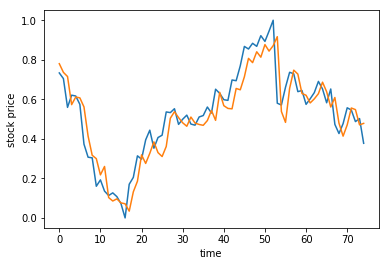

In [27]:
%matplotlib inline

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, cv=sess.run([train, cost], feed_dict={x:trainX, y:trainY})
        print("step:{}, cost:{}".format(i,cv))
    test_predict=sess.run(yHat, feed_dict={x:testX})
    rmse_val=sess.run(rmse, feed_dict={targets:testY, predictions:test_predict})
    print("rmse:{}".format(rmse_val))
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("time")
    plt.ylabel("stock price")
    plt.show()